# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

Proportions Z-test p-value: 0.9639
Chi-Square test for independence p-value: 0.6150


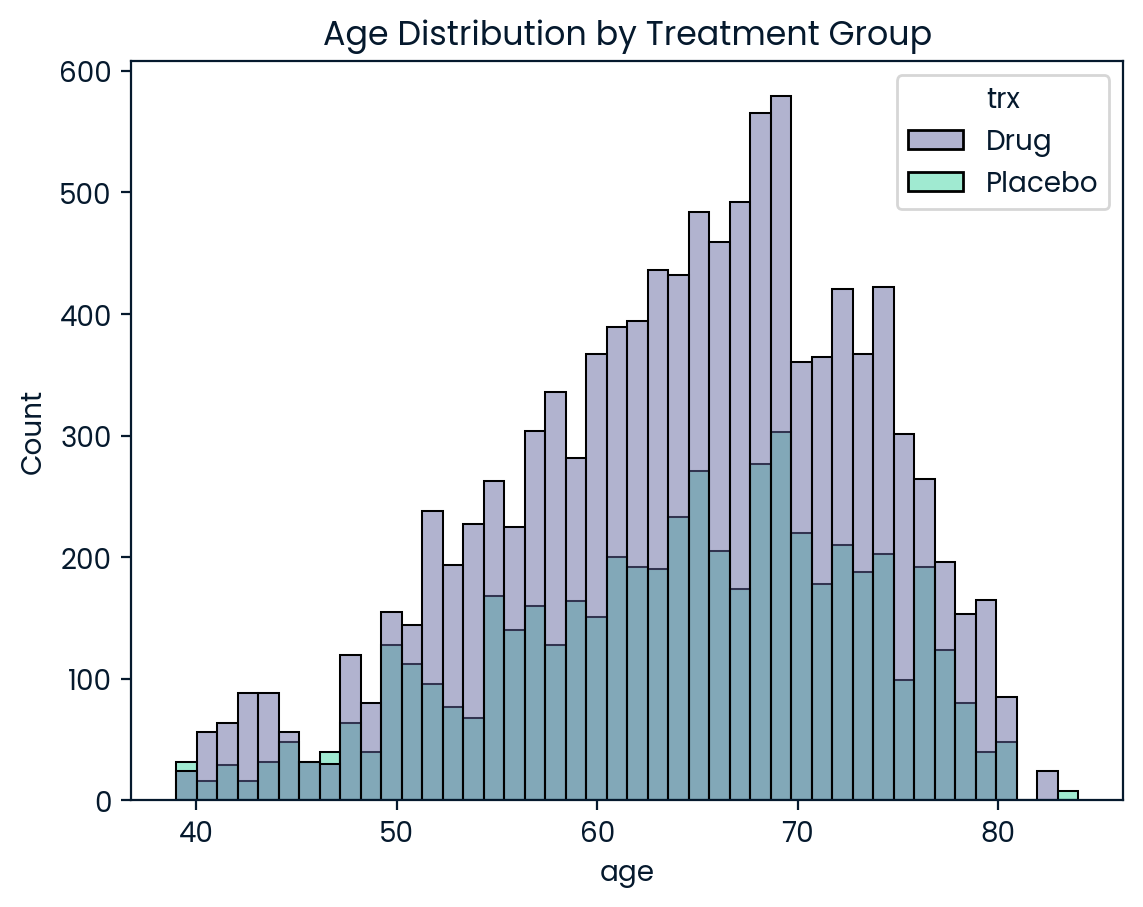

MWU    0.256963
Name: p-val, dtype: float64


In [28]:
"""
Project Name: Drug Safety Hypothesis Testing
Description: 
    This script analyzes drug safety data to compare adverse effects between a drug and placebo group.
    It runs a proportions Z-test to see if there's a difference in adverse effect rates, checks if the 
    number of side effects depends on the treatment group with a Chi-square test, and visualizes age 
    distribution by group. It also tests age normality and compares age between groups using a 
    Mann-Whitney U test since the data isn't normally distributed.

Author: Beulah Nwokotubo
Date Created: August 15, 2024
Version: 1.0

Steps:
    1. Data Analysis: Counting adverse effects and totals for drug and placebo groups.
    2. Z-Test: Performing a proportions Z-test for adverse effect differences.
    3. Chi-Square Test: Checking independence between the number of effects and treatment group.
    4. Data Visualization: Plotting age distribution across treatment groups.
    5. Mann-Whitney U Test: Comparing age distributions between the drug and placebo groups.

Dependencies:
    - pandas
    - statsmodels
    - pingouin
    - seaborn
    - matplotlib
    - drug_safety.csv (data file)
"""

import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Count the adverse_effects column values for each trx group
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()

# Compute total rows in each group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()

# Create an array of the "Yes" counts for each group
yeses = [adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]]

# Create an array of the total number of rows in each group
n = [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]

# Perform a two-sided z-test on the two proportions
two_sample_results = proportions_ztest(yeses, n)

# Store the p-value
two_sample_p_value = two_sample_results[1]
print(f"Proportions Z-test p-value: {two_sample_p_value:.4f}")

# Determine if num_effects and trx are independent
num_effects_groups = pg.chi2_independence(data=drug_safety, x="num_effects", y="trx")

# Extract the p-value
num_effects_p_value = num_effects_groups[2]["pval"][0]
print(f"Chi-Square test for independence p-value: {num_effects_p_value:.4f}")

# Create a histogram with Seaborn
sns.histplot(data=drug_safety, x="age", hue="trx")
plt.title('Age Distribution by Treatment Group')
plt.show()

# Optionally - confirm the histogram's output by conducting a normality test
normality = pg.normality(data=drug_safety, dv='age', group='trx', method='shapiro', alpha=0.05)

# Select the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]

# Select the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

# Since the data distribution is not normal, conduct a two-sided Mann-Whitney U test
age_group_effects = pg.mwu(age_trx, age_placebo)

# Extract the p-value
age_group_effects_p_value = age_group_effects["p-val"]
print(age_group_effects_p_value)
